### Not necessary unless data is not annotated and not in train and test set

In [ ]:
'''# not to be used unless data is not annotated properly
import os

def rename_files(directory, prefix):
    i = 1
    for filename in os.listdir(directory):
        new_name = f"{prefix}_{i}.jpg"  # change the extension if your images are not jpg
        source = os.path.join(directory, filename)
        destination = os.path.join(directory, new_name)

        os.rename(source, destination)  # rename the file
        i += 1

# replace with your directory paths
directory_path1 = "/content/drive/MyDrive/new_ovary_data/malignant"
directory_path2 = "/content/drive/MyDrive/new_ovary_data/benign"

rename_files(directory_path1, "malignant")
rename_files(directory_path2, "benign")'''

'# not to be used unless data is not annotated properly\nimport os\n\ndef rename_files(directory, prefix):\n    i = 1\n    for filename in os.listdir(directory):\n        new_name = f"{prefix}_{i}.jpg"  # change the extension if your images are not jpg\n        source = os.path.join(directory, filename)\n        destination = os.path.join(directory, new_name)\n\n        os.rename(source, destination)  # rename the file\n        i += 1\n\n# replace with your directory paths\ndirectory_path1 = "/content/drive/MyDrive/new_ovary_data/malignant"\ndirectory_path2 = "/content/drive/MyDrive/new_ovary_data/benign"\n\nrename_files(directory_path1, "malignant")\nrename_files(directory_path2, "benign")'

In [ ]:
'''
import os
import shutil
import numpy as np

root_dir = '/content/drive/MyDrive/new_ovary_data'
classes = ['benign','malignant']

train_ratio = 0.8

for cls in classes:

    src_dir = os.path.join(root_dir, cls)
    all_files = os.listdir(src_dir)
    np.random.shuffle(all_files)
    print("class" ,cls, len(all_files))

    num_train = int(train_ratio * len(all_files))
    train_files = all_files[:num_train]
    test_files = all_files[num_train:]

    train_dir = os.path.join(root_dir, 'train', cls)
    test_dir = os.path.join(root_dir, 'test', cls)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for file in train_files:
        shutil.copy(os.path.join(src_dir, file), os.path.join(train_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(src_dir, file), os.path.join(test_dir, file))
'''

'\nimport os\nimport shutil\nimport numpy as np\n\nroot_dir = \'/content/drive/MyDrive/new_ovary_data\'\nclasses = [\'benign\',\'malignant\']\n\ntrain_ratio = 0.8\n\nfor cls in classes:\n\n    src_dir = os.path.join(root_dir, cls)\n    all_files = os.listdir(src_dir)\n    np.random.shuffle(all_files)\n    print("class" ,cls, len(all_files))\n\n    num_train = int(train_ratio * len(all_files))\n    train_files = all_files[:num_train]\n    test_files = all_files[num_train:]\n\n    train_dir = os.path.join(root_dir, \'train\', cls)\n    test_dir = os.path.join(root_dir, \'test\', cls)\n    os.makedirs(train_dir, exist_ok=True)\n    os.makedirs(test_dir, exist_ok=True)\n\n    for file in train_files:\n        shutil.copy(os.path.join(src_dir, file), os.path.join(train_dir, file))\n    for file in test_files:\n        shutil.copy(os.path.join(src_dir, file), os.path.join(test_dir, file))\n'

### Import libraries, read dataset, Preprocess the images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import os
import random

In [ ]:
train_dir ="/content/drive/MyDrive/new_ovary_data/train"
test_dir = "/content/drive/MyDrive/new_ovary_data/test"


train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+'/'+label):
        train_paths.append(train_dir+'/'+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [ ]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+'/'+label):
        test_paths.append(test_dir+'/'+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

###data augementation

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

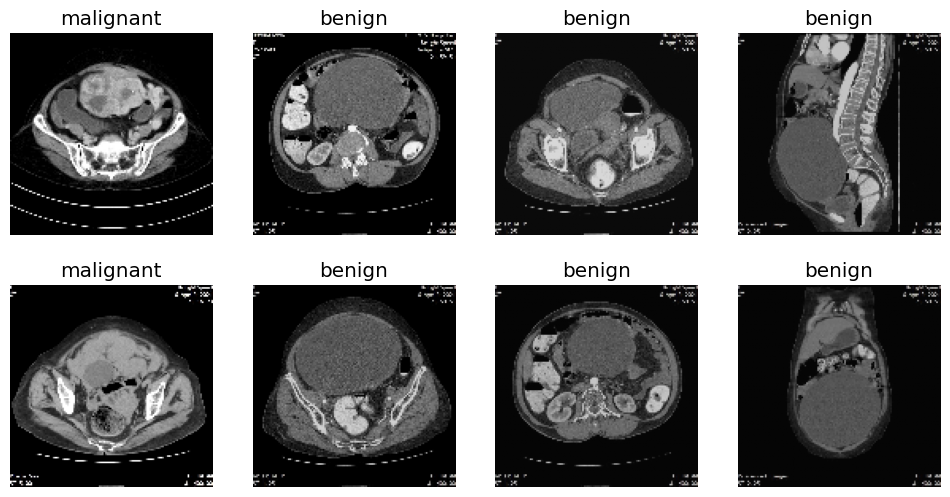

In [ ]:
IMAGE_SIZE = 128

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [ ]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score
import numpy as np


In [ ]:
vgg16_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')

for layer in vgg16_model.layers:
    layer.trainable = False


vgg16_model.layers[-2].trainable = True
vgg16_model.layers[-3].trainable = True
vgg16_model.layers[-4].trainable = True

final_vgg16_model = Sequential()
#final_vgg16_model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
final_vgg16_model.add(vgg16_model)
final_vgg16_model.add(Flatten())
#final_vgg16_model.add(Dropout(0.3))
#final_vgg16_model.add(Dense(128, activation='relu'))
#final_vgg16_model.add(Dropout(0.2))
final_vgg16_model.add(Dense(len(unique_labels), activation='softmax'))
final_vgg16_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_43 (Flatten)        (None, 8192)              0         
                                                                 
 dense_103 (Dense)           (None, 2)                 16386     
                                                                 
Total params: 14731074 (56.19 MB)
Trainable params: 7095810 (27.07 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
final_vgg16_model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
vgg16_history = final_vgg16_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=10),epochs=10, steps_per_epoch=20)

Epoch 1/10
20/20 [==============================] - 4s 160ms/step - loss: 0.9245 - sparse_categorical_accuracy: 0.3864
Epoch 2/10
20/20 [==============================] - 4s 176ms/step - loss: 0.6667 - sparse_categorical_accuracy: 0.5614
Epoch 3/10
20/20 [==============================] - 4s 208ms/step - loss: 0.5306 - sparse_categorical_accuracy: 0.8355
Epoch 4/10
20/20 [==============================] - 5s 225ms/step - loss: 0.4554 - sparse_categorical_accuracy: 0.8538
Epoch 5/10
20/20 [==============================] - 4s 176ms/step - loss: 0.4052 - sparse_categorical_accuracy: 0.8512
Epoch 6/10
20/20 [==============================] - 4s 178ms/step - loss: 0.3628 - sparse_categorical_accuracy: 0.8642
Epoch 7/10
20/20 [==============================] - 4s 209ms/step - loss: 0.3250 - sparse_categorical_accuracy: 0.8721
Epoch 8/10
20/20 [==============================] - 5s 227ms/step - loss: 0.2930 - sparse_categorical_accuracy: 0.9008
Epoch 9/10
20/20 [==============================

In [ ]:
batch_size = 16
steps = int(len(test_paths)/batch_size)
y_pred_vgg16_drop= []
y_true_vgg16_drop = []
for x,y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = final_vgg16_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred_vgg16_drop.append(i)
    for i in decode_label(y):
        y_true_vgg16_drop.append(i)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(classification_report(y_true_vgg16_drop, y_pred_vgg16_drop))

              precision    recall  f1-score   support

      benign       0.91      0.98      0.94        59
   malignant       0.97      0.84      0.90        38

    accuracy                           0.93        97
   macro avg       0.94      0.91      0.92        97
weighted avg       0.93      0.93      0.93        97



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score
print('Confusion Matrix')
print(confusion_matrix(y_true_vgg16_drop, y_pred_vgg16_drop))
print("\n\n Accuracy: ",accuracy_score(y_true_vgg16_drop, y_pred_vgg16_drop)*100)

Confusion Matrix
[[58  1]
 [ 6 32]]


 Accuracy:  92.78350515463917


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder and transform the labels
y_true_vgg16_drop= le.fit_transform(y_true_vgg16_drop)
y_pred_vgg16_drop = le.transform(y_pred_vgg16_drop)

# Now you can compute the F1 score
print("F1-Score: ", round(f1_score(y_true_vgg16_drop, y_pred_vgg16_drop)*100,2))
print("Precision: ", round(precision_score(y_true_vgg16_drop, y_pred_vgg16_drop)*100,2))

F1-Score:  90.14
Precision:  96.97


<Axes: >

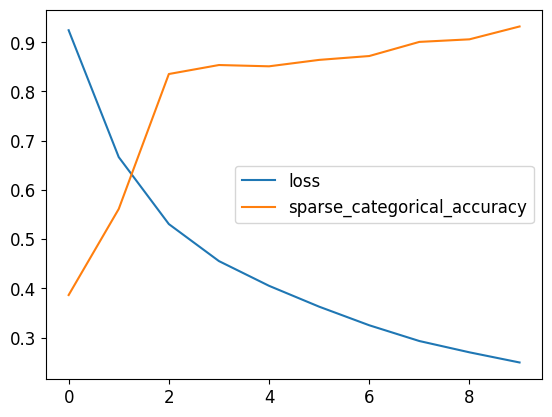

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(vgg16_history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### DenseNet101

In [ ]:
from keras.applications import DenseNet121
dense_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))


In [ ]:
for layer in dense_model.layers:
    layer.trainable = False


dense_model.layers[-2].trainable = True
dense_model.layers[-3].trainable = True
dense_model.layers[-4].trainable = True

final_dense_model = Sequential()
final_dense_model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
final_dense_model.add(dense_model)
final_dense_model.add(Flatten())
#final_dense_model.add(Dropout(0.3))
final_dense_model.add(Dense(64, activation='relu'))
#final_dense_model.add(Dropout(0.2))
final_dense_model.add(Dense(len(unique_labels), activation='softmax'))
final_dense_model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_44 (Flatten)        (None, 16384)             0         
                                                                 
 dense_104 (Dense)           (None, 64)                1048640   
                                                                 
 dense_105 (Dense)           (None, 2)                 130       
                                                                 
Total params: 8086274 (30.85 MB)
Trainable params: 1087682 (4.15 MB)
Non-trainable params: 6998592 (26.70 MB)
_________________________________________________________________


In [ ]:
final_dense_model.compile(optimizer= 'RMSprop',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
dense_history = final_dense_model.fit(datagen(train_paths, train_labels, batch_size=16, epochs=5),epochs=5, steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 8s 165ms/step - loss: 2.6416 - sparse_categorical_accuracy: 0.8687
Epoch 2/5
10/10 [==============================] - 2s 213ms/step - loss: 0.4190 - sparse_categorical_accuracy: 0.9500
Epoch 3/5
10/10 [==============================] - 2s 205ms/step - loss: 0.5819 - sparse_categorical_accuracy: 0.9434
Epoch 4/5
10/10 [==============================] - 2s 152ms/step - loss: 0.0829 - sparse_categorical_accuracy: 0.9688
Epoch 5/5
10/10 [==============================] - 1s 150ms/step - loss: 0.1554 - sparse_categorical_accuracy: 0.9748


In [ ]:
batch_size = 16
steps = int(len(test_paths)/batch_size)
y_pred_dense= []
y_true_dense = []
for x,y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = final_dense_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred_dense.append(i)
    for i in decode_label(y):
        y_true_dense.append(i)

1/1 [==============================] - 0s 34ms/step


In [ ]:
print(classification_report(y_true_dense, y_pred_dense))

              precision    recall  f1-score   support

      benign       0.97      1.00      0.98        59
   malignant       1.00      0.95      0.97        38

    accuracy                           0.98        97
   macro avg       0.98      0.97      0.98        97
weighted avg       0.98      0.98      0.98        97



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score
print('Confusion Matrix')
print(confusion_matrix(y_true_dense, y_pred_dense))
print("\n\n Accuracy: ",accuracy_score(y_true_dense, y_pred_dense)*100)

Confusion Matrix
[[59  0]
 [ 2 36]]


 Accuracy:  97.9381443298969


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder and transform the labels
y_true_dense= le.fit_transform(y_true_dense)
y_pred_dense = le.transform(y_pred_dense)

# Now you can compute the F1 score
print("F1-Score: ", round(f1_score(y_true_dense, y_pred_dense)*100,2))
print("Precision: ", round(precision_score(y_true_dense, y_pred_dense)*100,2))

F1-Score:  97.3
Precision:  100.0


<Axes: >

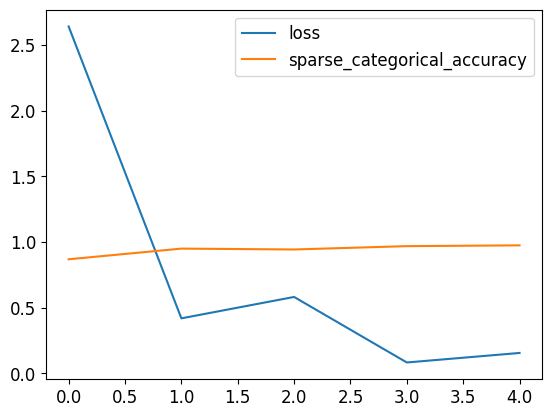

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(dense_history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

### LeNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB1
efficient_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))

In [ ]:
model = Sequential()
model.add(Conv2D(6, 5, activation='tanh',input_shape= (IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(16, 5, activation='tanh'))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(120, 5, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(len(unique_labels), activation='softmax'))
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_870 (Conv2D)         (None, 124, 124, 6)       456       
                                                                 
 average_pooling2d_97 (Aver  (None, 62, 62, 6)         0         
 agePooling2D)                                                   
                                                                 
 activation_862 (Activation  (None, 62, 62, 6)         0         
 )                                                               
                                                                 
 conv2d_871 (Conv2D)         (None, 58, 58, 16)        2416      
                                                                 
 average_pooling2d_98 (Aver  (None, 29, 29, 16)        0         
 agePooling2D)                                                   
                                                     

In [ ]:
model.compile(optimizer= 'Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
history = model.fit(datagen(train_paths, train_labels, batch_size=16, epochs=30),epochs=30, steps_per_epoch=10)

Epoch 1/30
10/10 [==============================] - 3s 158ms/step - loss: 5.0820 - sparse_categorical_accuracy: 0.6062
Epoch 2/30
10/10 [==============================] - 2s 195ms/step - loss: 4.8778 - sparse_categorical_accuracy: 0.6000
Epoch 3/30
10/10 [==============================] - 2s 184ms/step - loss: 3.6128 - sparse_categorical_accuracy: 0.6541
Epoch 4/30
10/10 [==============================] - 1s 141ms/step - loss: 4.2535 - sparse_categorical_accuracy: 0.5188
Epoch 5/30
10/10 [==============================] - 1s 141ms/step - loss: 2.1567 - sparse_categorical_accuracy: 0.6981
Epoch 6/30
10/10 [==============================] - 1s 144ms/step - loss: 2.4260 - sparse_categorical_accuracy: 0.5625
Epoch 7/30
10/10 [==============================] - 2s 158ms/step - loss: 1.5413 - sparse_categorical_accuracy: 0.6187
Epoch 8/30
10/10 [==============================] - 1s 143ms/step - loss: 0.9179 - sparse_categorical_accuracy: 0.6415
Epoch 9/30
10/10 [==============================

In [ ]:
batch_size = 16
steps = int(len(test_paths)/batch_size)
y_pred_len= []
y_true_len = []
for x,y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred_len.append(i)
    for i in decode_label(y):
        y_true_len.append(i)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(classification_report(y_true_len, y_pred_len))

              precision    recall  f1-score   support

      benign       0.61      1.00      0.76        59
   malignant       0.00      0.00      0.00        38

    accuracy                           0.61        97
   macro avg       0.30      0.50      0.38        97
weighted avg       0.37      0.61      0.46        97



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score
print('Confusion Matrix')
print(confusion_matrix(y_true_len, y_pred_len))
print("\n\n Accuracy: ",accuracy_score(y_true_len, y_pred_len)*100)

Confusion Matrix
[[59  0]
 [38  0]]


 Accuracy:  60.824742268041234


<Axes: >

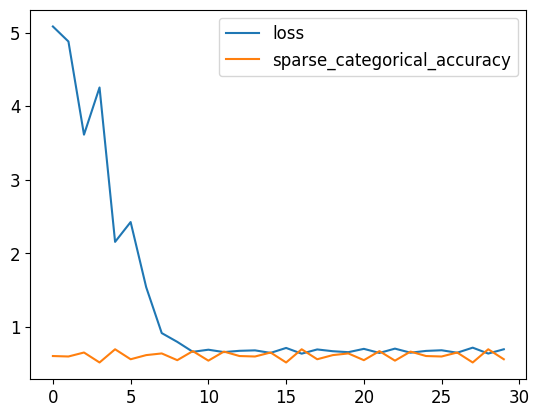

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

### Inception V3

In [ ]:
from tensorflow.keras.applications import InceptionV3
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))

In [ ]:
for layer in inception_model.layers:
    layer.trainable = False

inception_model.layers[-2].trainable = True
inception_model.layers[-3].trainable = True
#inception_model.layers[-4].trainable = True

final_inception_model = Sequential()
#final_inception_model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
final_inception_model.add(inception_model)
final_inception_model.add(Flatten())
final_inception_model.add(Dropout(0.3))
final_inception_model.add(Dense(128, activation='relu'))
final_inception_model.add(Dropout(0.2))
final_inception_model.add(Dense(64, activation='relu'))
final_inception_model.add(Dropout(0.2))
final_inception_model.add(Dense(len(unique_labels), activation='softmax'))
final_inception_model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_46 (Flatten)        (None, 8192)              0         
                                                                 
 dropout_54 (Dropout)        (None, 8192)              0         
                                                                 
 dense_108 (Dense)           (None, 128)               1048704   
                                                                 
 dropout_55 (Dropout)        (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 64)                8256      
                                                                 
 dropout_56 (Dropout)        (None, 64)              

In [ ]:
final_inception_model.compile(optimizer= 'Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
inception_history = final_inception_model.fit(datagen(train_paths, train_labels, batch_size=16, epochs=10),epochs=10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 6s 160ms/step - loss: 1.7251 - sparse_categorical_accuracy: 0.6562
Epoch 2/10
10/10 [==============================] - 2s 199ms/step - loss: 1.0278 - sparse_categorical_accuracy: 0.7375
Epoch 3/10
10/10 [==============================] - 2s 198ms/step - loss: 0.8736 - sparse_categorical_accuracy: 0.8113
Epoch 4/10
10/10 [==============================] - 2s 193ms/step - loss: 0.3601 - sparse_categorical_accuracy: 0.8687
Epoch 5/10
10/10 [==============================] - 2s 153ms/step - loss: 0.2022 - sparse_categorical_accuracy: 0.9371
Epoch 6/10
10/10 [==============================] - 1s 149ms/step - loss: 0.1441 - sparse_categorical_accuracy: 0.9438
Epoch 7/10
10/10 [==============================] - 1s 149ms/step - loss: 0.3891 - sparse_categorical_accuracy: 0.8875
Epoch 8/10
10/10 [==============================] - 1s 147ms/step - loss: 0.1614 - sparse_categorical_accuracy: 0.9308
Epoch 9/10
10/10 [==============================

In [ ]:
batch_size = 16
steps = int(len(test_paths)/batch_size)
y_pred_inc= []
y_true_inc = []
for x,y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = final_inception_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred_inc.append(i)
    for i in decode_label(y):
        y_true_inc.append(i)

1/1 [==============================] - 0s 43ms/step


In [ ]:
print(classification_report(y_true_inc, y_pred_inc))

              precision    recall  f1-score   support

      benign       0.94      0.98      0.96        59
   malignant       0.97      0.89      0.93        38

    accuracy                           0.95        97
   macro avg       0.95      0.94      0.95        97
weighted avg       0.95      0.95      0.95        97



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score
print('Confusion Matrix')
print(confusion_matrix(y_true_inc, y_pred_inc))
print("\n\n Accuracy: ",accuracy_score(y_true_inc, y_pred_inc)*100)

Confusion Matrix
[[58  1]
 [ 4 34]]


 Accuracy:  94.84536082474226


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder and transform the labels
y_true_inc= le.fit_transform(y_true_inc)
y_pred_inc = le.transform(y_pred_inc)

# Now you can compute the F1 score
print("F1-Score: ", round(f1_score(y_true_inc, y_pred_inc)*100,2))
print("Precision: ", round(precision_score(y_true_inc, y_pred_inc)*100,2))

F1-Score:  93.15
Precision:  97.14


<Axes: >

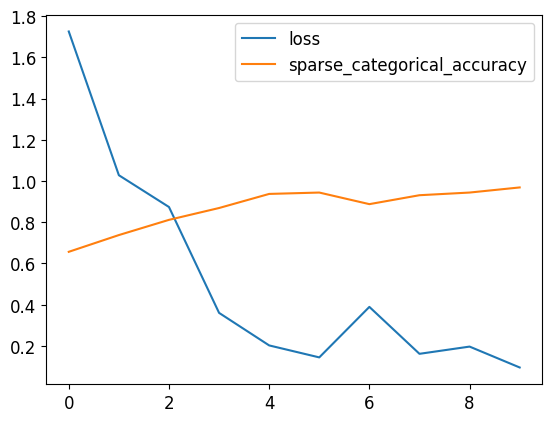

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(inception_history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

### ResNet152

In [ ]:
from tensorflow.keras.applications import ResNet152
resnet_model = ResNet152(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))

In [ ]:
for layer in resnet_model.layers:
    layer.trainable = False

resnet_model.layers[-2].trainable = True
resnet_model.layers[-3].trainable = True
resnet_model.layers[-4].trainable = True

final_resnet_model = Sequential()
final_resnet_model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
final_resnet_model.add(resnet_model)
final_resnet_model.add(Flatten())
final_resnet_model.add(Dropout(0.3))
final_resnet_model.add(Dense(1024, activation='relu'))
final_resnet_model.add(Dropout(0.2))
final_resnet_model.add(Dense(512, activation='relu'))
final_resnet_model.add(Dropout(0.2))
final_resnet_model.add(Dense(256, activation='relu'))
final_resnet_model.add(Dense(len(unique_labels), activation='softmax'))
final_resnet_model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 4, 4, 2048)        58370944  
                                                                 
 flatten_47 (Flatten)        (None, 32768)             0         
                                                                 
 dropout_57 (Dropout)        (None, 32768)             0         
                                                                 
 dense_111 (Dense)           (None, 1024)              33555456  
                                                                 
 dropout_58 (Dropout)        (None, 1024)              0         
                                                                 
 dense_112 (Dense)           (None, 512)               524800    
                                                                 
 dropout_59 (Dropout)        (None, 512)             

In [ ]:
final_resnet_model.compile(optimizer= 'Adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
resnet_history = final_resnet_model.fit(datagen(train_paths, train_labels, batch_size=16, epochs=80),epochs=80, steps_per_epoch=10)

Epoch 1/80
10/10 [==============================] - 13s 134ms/step - loss: 2.3549 - sparse_categorical_accuracy: 0.5125
Epoch 2/80
10/10 [==============================] - 2s 157ms/step - loss: 0.6990 - sparse_categorical_accuracy: 0.6000
Epoch 3/80
10/10 [==============================] - 2s 159ms/step - loss: 0.4174 - sparse_categorical_accuracy: 0.8239
Epoch 4/80
10/10 [==============================] - 2s 157ms/step - loss: 0.3609 - sparse_categorical_accuracy: 0.8125
Epoch 5/80
10/10 [==============================] - 2s 155ms/step - loss: 0.2419 - sparse_categorical_accuracy: 0.8805
Epoch 6/80
10/10 [==============================] - 2s 165ms/step - loss: 0.2056 - sparse_categorical_accuracy: 0.9250
Epoch 7/80
10/10 [==============================] - 2s 201ms/step - loss: 0.2759 - sparse_categorical_accuracy: 0.8938
Epoch 8/80
10/10 [==============================] - 2s 223ms/step - loss: 0.2115 - sparse_categorical_accuracy: 0.9119
Epoch 9/80
10/10 [=============================

In [ ]:
batch_size = 16
steps = int(len(test_paths)/batch_size)
y_pred_res= []
y_true_res = []
for x,y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = final_resnet_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred_res.append(i)
    for i in decode_label(y):
        y_true_res.append(i)

1/1 [==============================] - 0s 33ms/step


In [ ]:
print(classification_report(y_true_res, y_pred_res))

              precision    recall  f1-score   support

      benign       0.98      0.98      0.98        59
   malignant       0.97      0.97      0.97        38

    accuracy                           0.98        97
   macro avg       0.98      0.98      0.98        97
weighted avg       0.98      0.98      0.98        97



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score
print('Confusion Matrix')
print(confusion_matrix(y_true_res, y_pred_res))
print("\n\n Accuracy: ",accuracy_score(y_true_res, y_pred_res)*100)

Confusion Matrix
[[58  1]
 [ 1 37]]


 Accuracy:  97.9381443298969


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder and transform the labels
y_true_res= le.fit_transform(y_true_res)
y_pred_res = le.transform(y_pred_res)

# Now you can compute the F1 score
print("F1-Score: ", round(f1_score(y_true_res, y_pred_res)*100,2))
print("Precision: ", round(precision_score(y_true_res, y_pred_res)*100,2))

F1-Score:  97.37
Precision:  97.37


<Axes: >

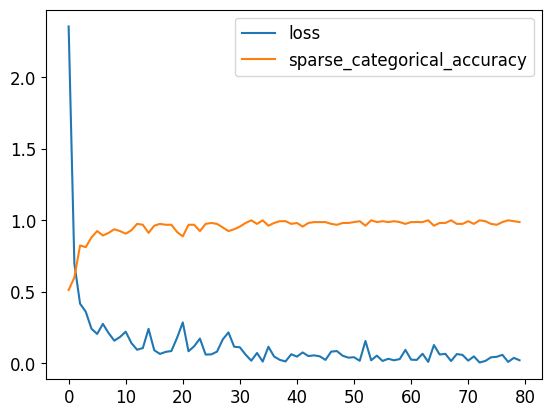

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(resnet_history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

### Ensemble model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Initialize a label encoder
le = LabelEncoder()

# Fit the label encoder on all possible labels
all_labels = np.concatenate((y_pred_dense, y_pred_inc, y_pred_res, y_pred_vgg16_drop, test_labels))
le.fit(all_labels)

# Transform the model predictions
#y_pred_len_encoded = le.transform(y_pred_len)
y_pred_dense_encoded = le.transform(y_pred_dense)
y_pred_inc_encoded = le.transform(y_pred_inc)
y_pred_res_encoded = le.transform(y_pred_res)
y_pred_vgg16_drop_encoded = le.transform(y_pred_vgg16_drop)

X = np.array([y_pred_dense_encoded,y_pred_inc_encoded,y_pred_res_encoded, y_pred_vgg16_drop_encoded]).T

# Encode the true labels
y = le.transform(test_labels)

# Train a RandomForest model on the model outputs
meta_learner = RandomForestClassifier()
meta_learner.fit(X, y)

# To make predictions with the ensemble model
ensemble_predictions = meta_learner.predict(X)

# Decode the ensemble predictions
ensemble_predictions = le.inverse_transform(ensemble_predictions)


In [ ]:
print(confusion_matrix(test_labels,ensemble_predictions ))

[[58  1]
 [ 0 38]]


In [ ]:
print(round(accuracy_score(test_labels,ensemble_predictions )*100,3))

98.969


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder and transform the labels
test_labels_encoded = le.fit_transform(test_labels)
ensemble_predictions_encoded = le.transform(ensemble_predictions)

# Now you can compute the F1 score
print("F1-Score: ", round(f1_score(test_labels_encoded, ensemble_predictions_encoded)*100,2))
print("Precision: ", round(precision_score(test_labels_encoded, ensemble_predictions_encoded)*100,2))

F1-Score:  98.7
Precision:  97.44


In [ ]:
print(classification_report(test_labels,ensemble_predictions ))

              precision    recall  f1-score   support

      benign       1.00      0.98      0.99        59
   malignant       0.97      1.00      0.99        38

    accuracy                           0.99        97
   macro avg       0.99      0.99      0.99        97
weighted avg       0.99      0.99      0.99        97



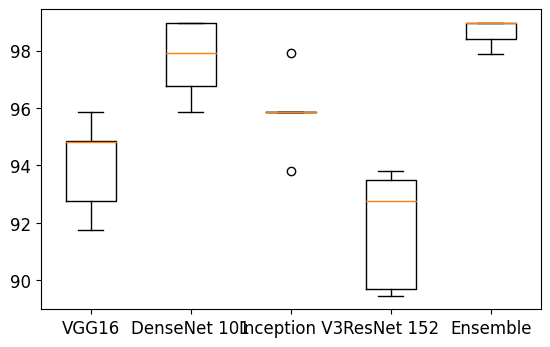

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_1 = np.asarray([94.81, 91.75, 92.78, 95.87, 94.84 ])   #VGG16
model_2 = np.asarray([98.96, 98.96, 95.87, 97.93,96.78 ])    #DenseNet 101
#model_3 = np.asarray([60.82, 60.82, 60.82, 60.82,60.82 ])   #EfficientNet B1
model_4 = np.asarray([93.81, 95.87, 95.87, 95.87, 97.93])   #Inception V3
model_5 = np.asarray([93.81, 89.69, 92.78, 89.47, 93.48])   #ResNet 152

model_6 = np.asarray([98.96, 98.96, 97.87])  #Ensemble

data = [model_1, model_2,model_4, model_5, model_6]

fig = plt.figure(figsize =(5, 3))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data, labels = ['VGG16', 'DenseNet 101', 'Inception V3', 'ResNet 152', 'Ensemble'])

# show plot
plt.show()